Value counts for birth states (USA only):
CA                21
TX                 9
FL                 8
MN                 6
AL                 5
NY                 5
NJ                 5
PA                 4
CT                 4
IL                 4
NC                 3
OR                 3
MS                 3
OH                 3
MO                 3
WA                 3
IA                 2
MA                 2
CO                 2
GA                 2
OK                 2
NV                 2
VA                 2
ID                 1
ME                 1
NH                 1
WY                 1
NM                 1
KY                 1
Nova Scotia        1
Fl                 1
SC                 1
TN                 1
KS                 1
MI                 1
UT                 1
AZ                 1
NE                 1
HI                 1
D.C.               1
IN                 1
MT                 1
North Carolina     1
Name: BirthState, dtype: int64
Average height: 73.40 in

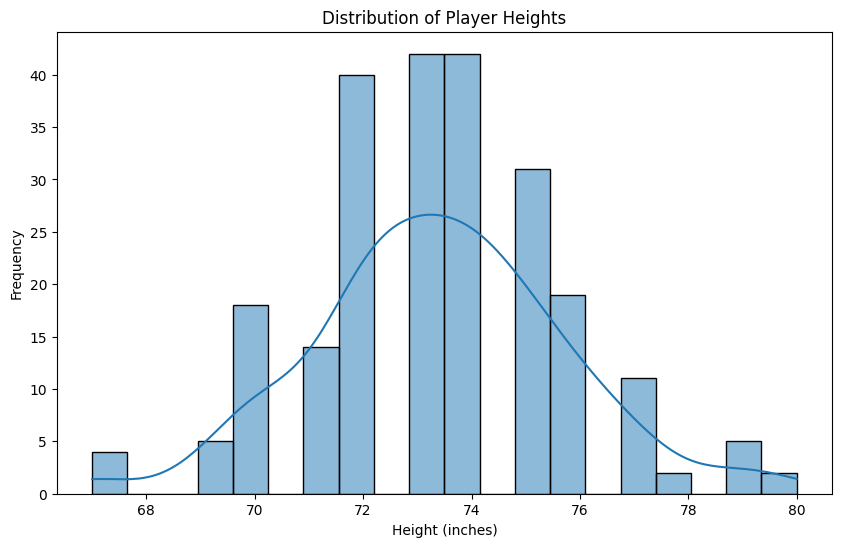

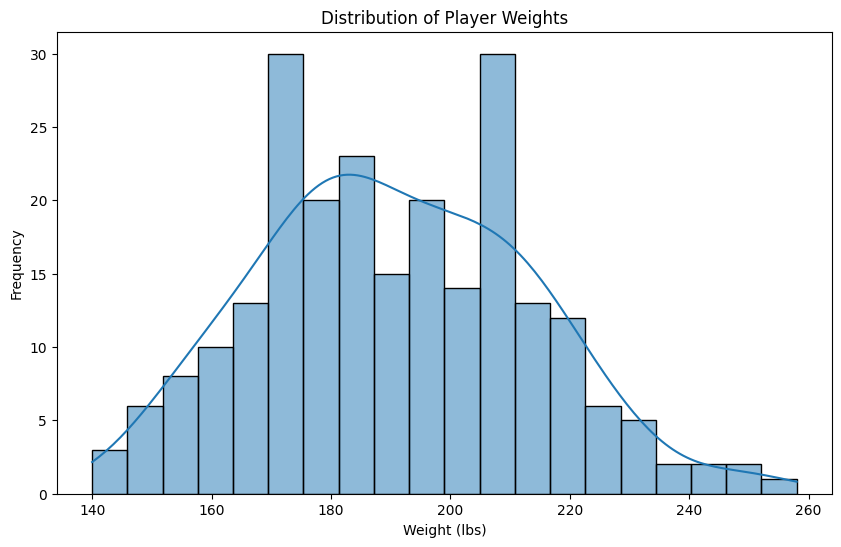

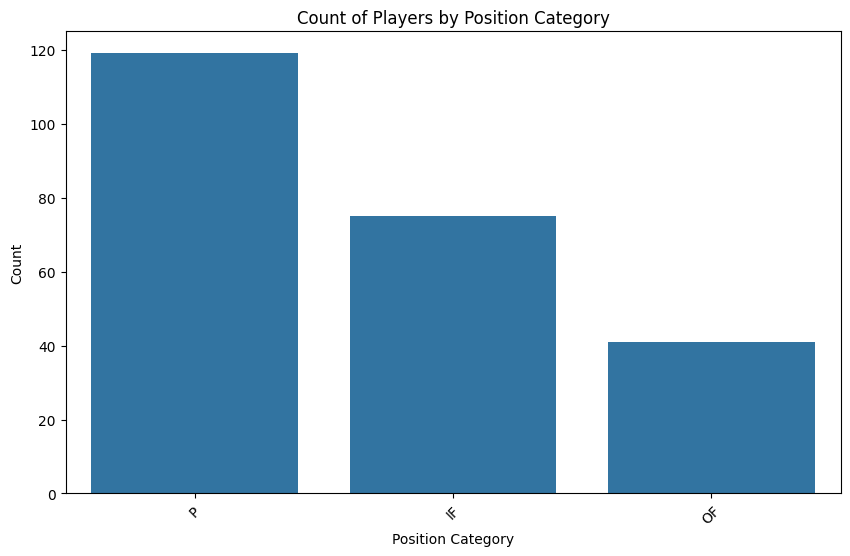

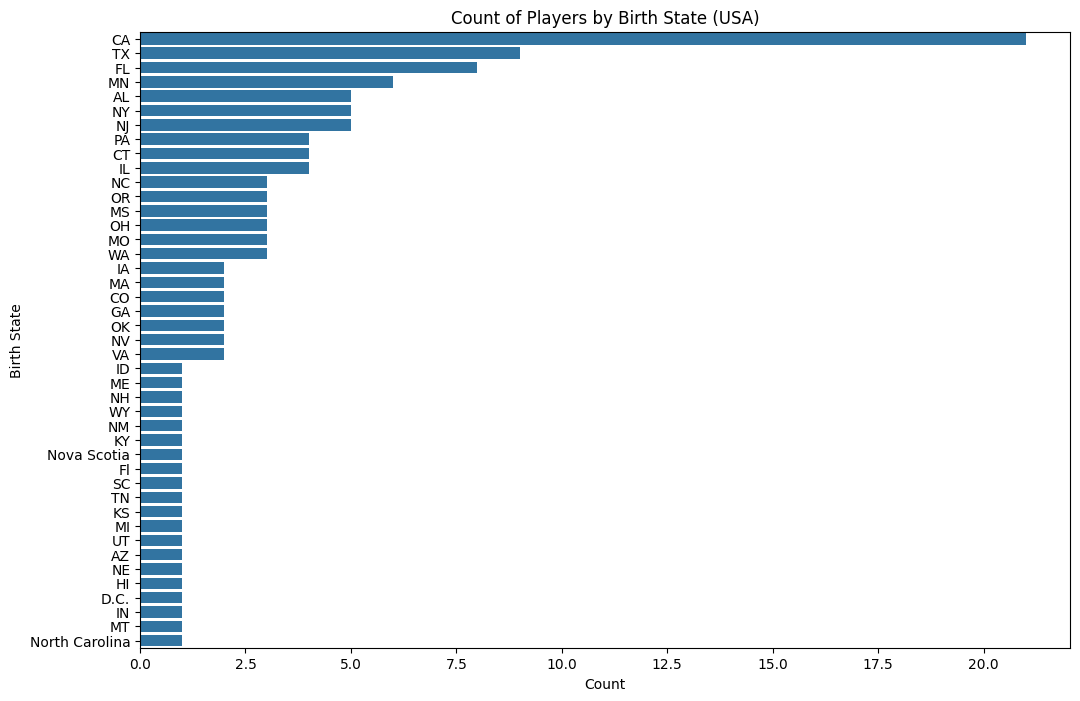

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Load the cleaned data
file_path = os.getenv('CLEANED_DATA_PATH')
if file_path is None:
    raise ValueError("CLEANED_DATA_PATH environment variable not set.")

cleaned_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
cleaned_data.head()

# Calculate value counts for birth states (USA only)
usa_players = cleaned_data[cleaned_data['BirthCountry'] == 'USA']
birth_state_counts = usa_players['BirthState'].value_counts()
print("Value counts for birth states (USA only):")
print(birth_state_counts)

# Calculate the average height and weight of players
average_height = cleaned_data['Height'].mean()
average_weight = cleaned_data['Weight'].mean()
print(f"Average height: {average_height:.2f} inches")
print(f"Average weight: {average_weight:.2f} lbs")

# Plot the distribution of player heights
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of player weights
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of players by position category
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='PositionCategory', order=cleaned_data['PositionCategory'].value_counts().index)
plt.title('Count of Players by Position Category')
plt.xlabel('Position Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the count of players by birth state (USA only)
plt.figure(figsize=(12, 8))
sns.countplot(data=usa_players, y='BirthState', order=usa_players['BirthState'].value_counts().index)
plt.title('Count of Players by Birth State (USA)')
plt.xlabel('Count')
plt.ylabel('Birth State')
plt.show()